# Simple Identification of Geometric Figures

##  Create a script in OpenCV-Python that can identify hexagons, triangles, rectangles, squares in attached image "shapes.jpg"

Have the script draw the outlines around the found figures and display a "text label" at each found figure describing the type of figure. To draw / highlight the outline around a figure, you can use cv2.drawContours. To print print "text labels" you can use cv2.putText. Check the OpenCV-Python manual for more info!

The solution can be simplified in such a way that you assume in the script that if a found closed contour has:

* 3 corners => triangle
* 4 corners => rectangle or square
* 6 corners => hexagon

To find out if a found quadrilateral is a square or a rectangle, you can use the cv2.boundingRect function (give the contour of the quadrilateral as a parameter) to examine the width and height of the quadrilateral. If the width is about the same as the height, you can assume that it is a square, otherwise a rectangle!

In [227]:
# Import libraries
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import scipy.ndimage as ndimage

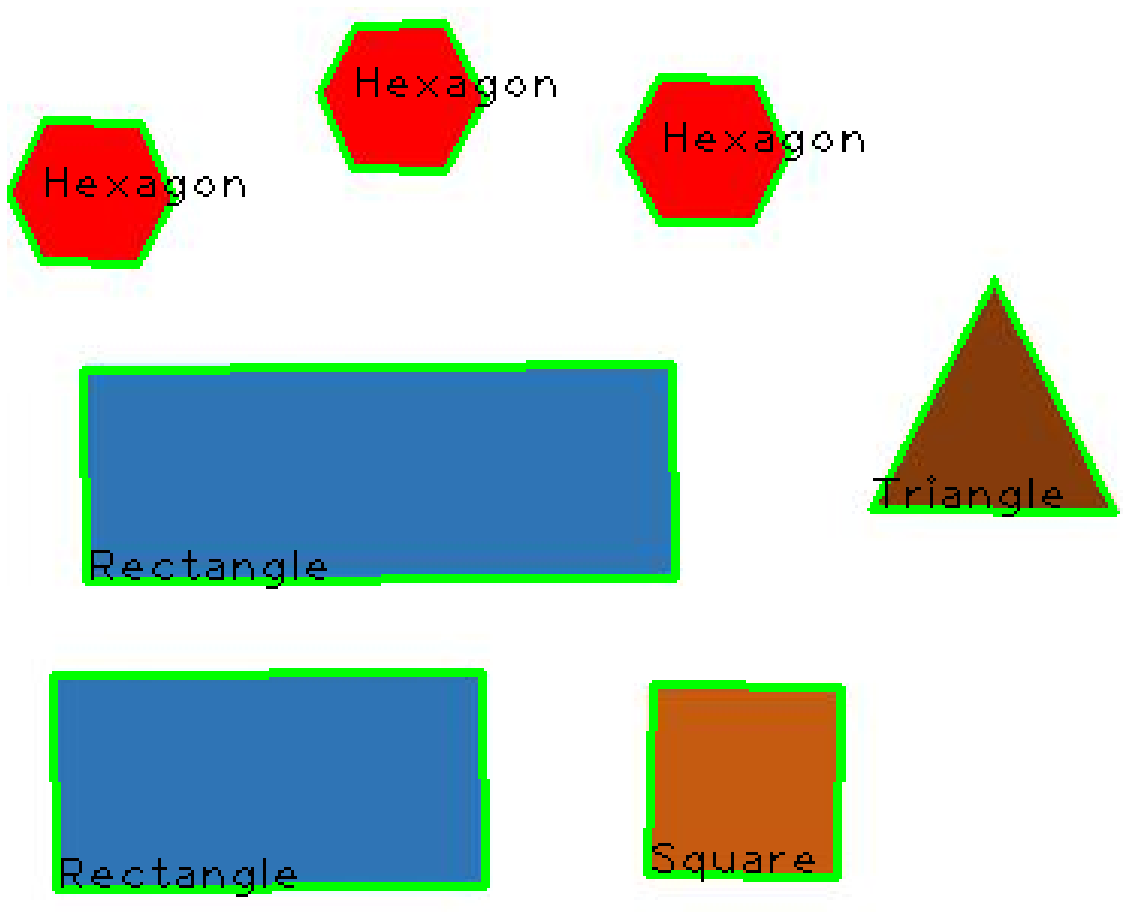

In [252]:
shapes = cv.imread('shapes.jpg') # Load in image
imgray = cv.cvtColor(shapes, cv.COLOR_BGR2GRAY) # Apply grey scale to image
ret, thresh = cv.threshold(imgray, 127, 255, 0) # Apply threshold 
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE) # Find all countours of the image
contours.pop(0) # Remove first element (it is the whole image corners)

# Check each countour then label and draw the outlines
for cont in contours:
    # Approximate the polygon, use arclenght to calculate the error margin epsilon
    perimeter = cv.arcLength(cont,True)
    epsilon = 0.01*perimeter
    approx = cv.approxPolyDP(cont,epsilon,True)
    
    # Variables for cv.putText
    font =  cv.FONT_HERSHEY_PLAIN
    fontSize = 1.0
    fontColor = (0, 0, 0) 
    fontThickness = 1
    
    # Check for amount of coordinates to decide what shape the polygon is
    if(len(approx) == 3): # Triangle
        cv.drawContours(shapes, [approx], -1, (0,255,0), 2)
        cv.putText(shapes, "Triangle", (approx[2][0][0], approx[2][0][1]), font, fontSize, fontColor, fontThickness)
        
    elif(len(approx) == 4):# Rectangle or Square
        cv.drawContours(shapes, [approx], -1, (0,255,0), 2)
        
        # Check if width is almost the same as height (=Square) (error margin 5%)
        (x, y, w, h) = cv.boundingRect(approx)
        if(w/h < 1.05 and  h/w < 1.05): # Square
            cv.putText(shapes, "Square", (approx[3][0][0], approx[3][0][1]), font, fontSize, fontColor, fontThickness)
        else: # Rectangle
            cv.putText(shapes, "Rectangle", (approx[3][0][0], approx[3][0][1]), font, fontSize, fontColor, fontThickness) 
            
    elif(len(approx) == 6): # Hexagon
        cv.drawContours(shapes, [approx], -1, (0,255,0), 2)
        cv.putText(shapes, "Hexagon", (approx[4][0][0], approx[2][0][1]), font, fontSize, fontColor, fontThickness)

#Show image
plt.figure(figsize = (20,20))
plt.imshow(cv.cvtColor(shapes, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

This script now can identify these 4 shapes and outline them. The script starts with turning the image to grayscale, then using a treshold and findContours to get all the geometric figures contour coordinates. After that the script goes through all the contours and approximates the shape with approxPolyDP. After that the script checks the amount of coordinates to check what shape it is and labels the polygon and outlines it. If the shape is a quadrilateral it will compare te width and height to be about the same and label it with rectangle or square depending on the width to height ratio. Lastly the script will show the image.

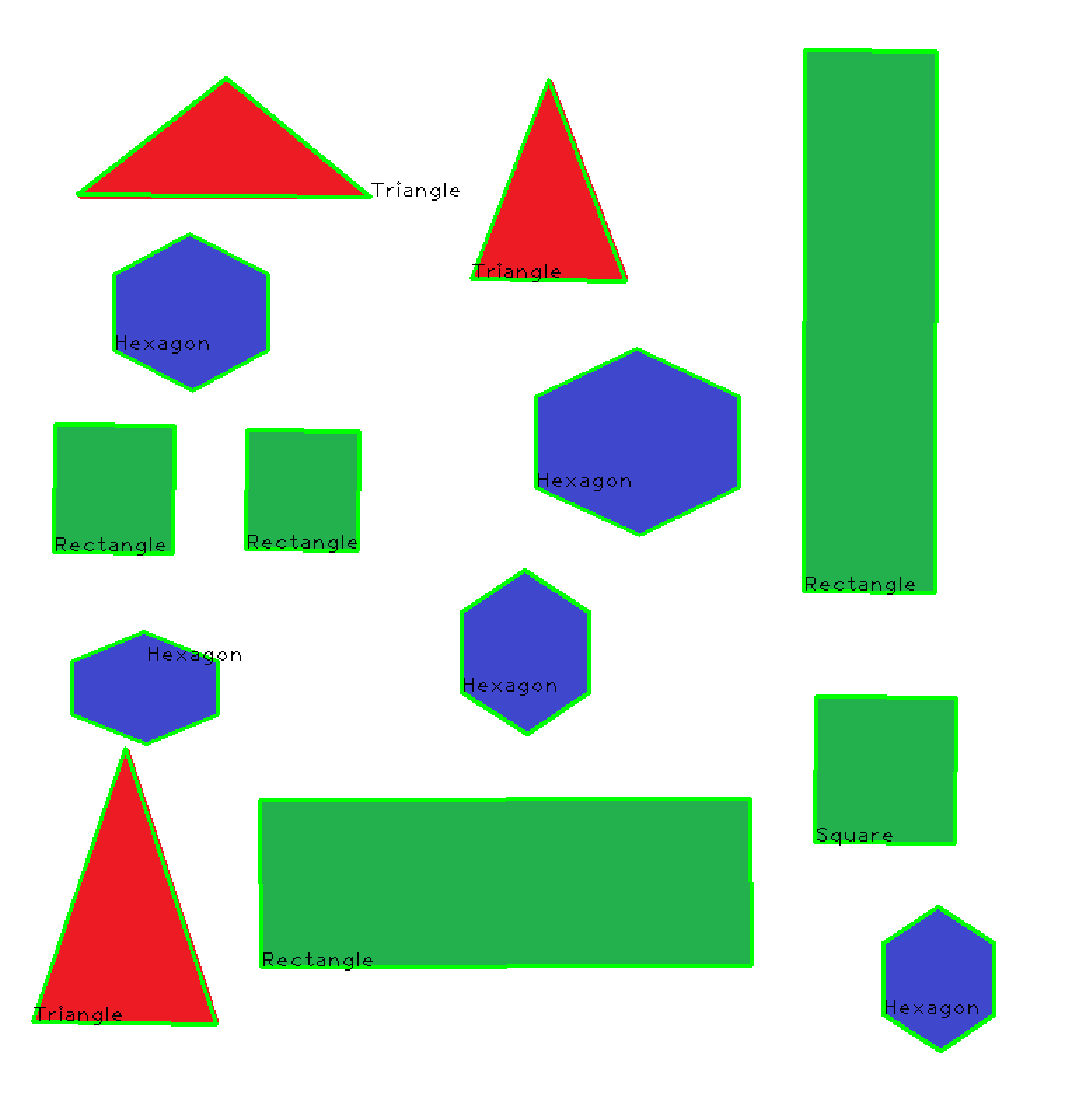

In [253]:
shapes = cv.imread('test.jpg') # Load in image
imgray = cv.cvtColor(shapes, cv.COLOR_BGR2GRAY) # Apply grey scale to image
ret, thresh = cv.threshold(imgray, 127, 255, 0) # Apply threshold 
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE) # Find all countours of the image
contours.pop(0) # Remove first element (it is the whole image corners)

# Check each countour then label and draw the outlines
for cont in contours:
    # Approximate the polygon, use arclenght to calculate the error margin epsilon
    perimeter = cv.arcLength(cont,True)
    epsilon = 0.01*perimeter
    approx = cv.approxPolyDP(cont,epsilon,True)
    
    # Variables for cv.putText
    font =  cv.FONT_HERSHEY_PLAIN
    fontSize = 1.0
    fontColor = (0, 0, 0) 
    fontThickness = 1
    
    # Check for amount of coordinates to decide what shape the polygon is
    if(len(approx) == 3): # Triangle
        cv.drawContours(shapes, [approx], -1, (0,255,0), 2)
        cv.putText(shapes, "Triangle", (approx[2][0][0], approx[2][0][1]), font, fontSize, fontColor, fontThickness)
        
    elif(len(approx) == 4):# Rectangle or Square
        cv.drawContours(shapes, [approx], -1, (0,255,0), 2)
        
        # Check if width is almost the same as height (=Square) (error margin 5%)
        (x, y, w, h) = cv.boundingRect(approx)
        if(w/h < 1.05 and  h/w < 1.05): # Square
            cv.putText(shapes, "Square", (approx[3][0][0], approx[3][0][1]), font, fontSize, fontColor, fontThickness)
        else: # Rectangle
            cv.putText(shapes, "Rectangle", (approx[3][0][0], approx[3][0][1]), font, fontSize, fontColor, fontThickness) 
            
    elif(len(approx) == 6): # Hexagon
        cv.drawContours(shapes, [approx], -1, (0,255,0), 2)
        cv.putText(shapes, "Hexagon", (approx[4][0][0], approx[2][0][1]), font, fontSize, fontColor, fontThickness)

#Show image
plt.figure(figsize = (20,20))
plt.imshow(cv.cvtColor(shapes, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()